# Lab 4 

Welcome to lab 4! You will practice using tables and bar chart to take another look at the Titanic data. 

In [1]:
# !pip install datascience   # You need to run this cell if you are working on Azure

In [2]:
# Import modules 

import numpy as np
from datascience import *
from datascience_extensions import *
%matplotlib inline

A summary of the methods to Table is [here](http://data8.org/datascience/tables.html) <br>
A tutorial for the datascience module is [here](http://data8.org/datascience/tutorial.html) <br>
A cheatsheet for the datascience module is [here](https://github.com/wstuetzle/STAT180/blob/master/Computing/data8_sp17_midterm_ref_sheet.pdf)

** 1. Read the titanic data from "titanic3-table.csv" and show the fist three rows **

In [3]:
titanic = Table.read_table("titanic3-table.csv")
titanic.show(4)

pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.338,B5,S,2,nan,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,nan,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"
1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,nan,135,"Montreal, PQ / Chesterville, ON"


** 2. Produce a table of the conditional distribution of survived, given pclass and draw the corresponding bar chart **

** Hints: **
* Use the .group method with the optional argument "collect"
* For a binary feature taking on the numerical values 0 or 1 the relative 
   frequency of 1 is the mean value of the feature

pclass,survived mean
1,0.619195
2,0.429603
3,0.255289


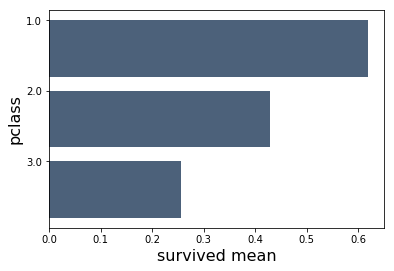

In [4]:
tab = titanic.select("survived", "pclass").group("pclass", collect = np.mean)
tab.barh("pclass")
tab

** 3. Fill in the missing word **

First class passengers were about ... times as likely to survive as third class passengers

First class passengers were about twice as likely to survive as first class passengers

** 4. Produce a table of the conditional distribution of survived, 
given pclass and sex, and draw the corresponding bar chart **

** Hint: **
* Use the .pivot method with the optional arguments "vals" and "collect"


pclass,female,male
1,0.965278,0.340782
2,0.886792,0.146199
3,0.490741,0.15213


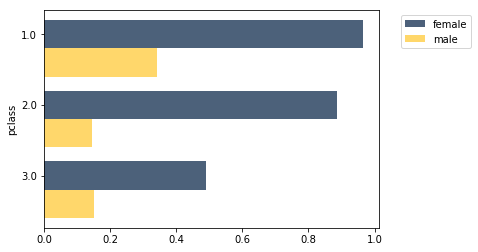

In [5]:
tab = titanic.pivot("sex", "pclass", "survived", collect = np.mean)
tab.barh("pclass")
tab

** 5. Fill in the missing words **

* Females in 2nd class were about ...% as likely to survive as females in 1st class

* Females in 3rd class were about ...% as likely to survive as females in 1st class

* Females in 2nd class were about 90% as likely to survive as females in 1st class

* Females in 3rd class were about half as likely to survive as females in 1st class

** 6. Produce the analogous table and barchart for the conditional distribution of died, given pclass and sex. **

In [6]:
survived = titanic.column("survived")
died = 1 - survived
titanic = titanic.with_column("died", died)

pclass,female,male
1,0.0347222,0.659218
2,0.113208,0.853801
3,0.509259,0.84787


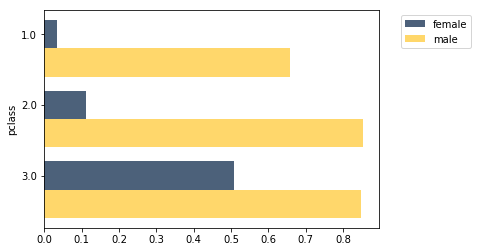

In [7]:
tab = titanic.pivot("sex", "pclass", "died", collect = np.mean)
tab.barh("pclass")
tab

** 7. Fill in the missing words **

* Females in 2nd class were about ... times as likely to die as females in 1st class

* Females in 3rd class were about ... times as likely to die as females in 1st class

* Females in 2nd class were about three times as likely to die as females in 1st class

* Females in 3rd class were about 15 times as likely to die as females in 1st class

** 8. Create a new table titanic_wa ("with age") containig all the passengers of titanic with known age. **

* Print the number of rows of titanic_wa

In [9]:
titanic_wa = titanic.where('age', np.isfinite)
titanic_wa.shape()

[1046, 15]

** 9. For the table titanic_wa create a new feature "mfc" (for Male, Female, or Child) with values "male", "female", "child" **

* Any passenger age 15 or younger is considered  child

* Show the first four rows.

In [ ]:
age = titanic_wa.column("age") 
mfc = np.copy(titanic_wa.column("sex"))  # you have to copy the array - or sex will change
for i in range(len(mfc)):
    if age[i] <= 15:
        mfc[i] = "child"
titanic_wa = titanic_wa.with_column("mfc", mfc)
titanic_wa.show(4)

** 10. What can you say about the likelihood of survival of children compared to the likelihood of survival of women and men in the same cabin class?  (open ended question) **